In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from scipy.ndimage import gaussian_filter1d
import matplotlib

In [2]:
def init_plotting():
    plt.rcParams['figure.figsize'] = (7., 4.)
    plt.rcParams['font.size'] = 12
    # plt.rcParams['font.family'] = 'T'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    # plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 2.

    # plt.gca().spines['right'].set_color('none')
    # plt.gca().spines['top'].set_color('none')
    # plt.gca().xaxis.set_ticks_position('bottom')
    # plt.gca().yaxis.set_ticks_position('left')

init_plotting()

In [3]:
csv_path = "results_true/1024/1024_3_1e-05.csv"
smooth = False

/var/tmp/ipykernel_12147/2925297183.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


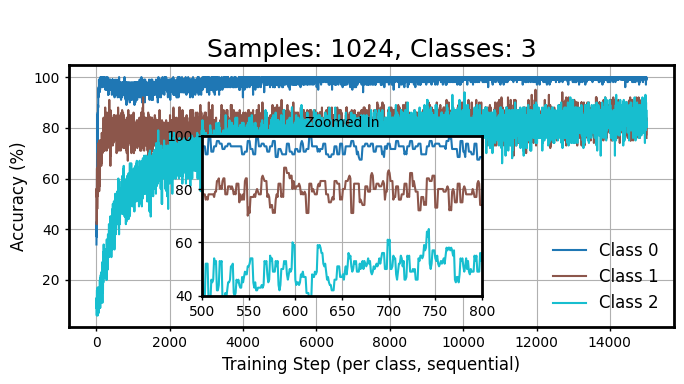

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Main plot
for i, accs in class_curves.items():
    accs = np.array(accs)
    if smooth:
        smoothed = gaussian_filter1d(accs, sigma=4)
        std = np.std(accs) * np.ones_like(accs)
        plt.plot(smoothed, label=f'Class {i}', color=colors[i])
        plt.fill_between(range(len(accs)), smoothed - std, smoothed + std, color=colors[i], alpha=0.2)
    else:
        plt.plot(accs, label=f'Class {i}', color=colors[i])

plt.title(f"\nSamples: {num_samples}, Classes: {num_classes}")
plt.xlabel("Training Step (per class, sequential)")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

l = 500
r = 800

# Add zoomed-in inset plot
ax_inset = inset_axes(plt.gca(), width="40%", height="40%", loc='lower center', bbox_to_anchor=(0, 0.22, 1, 1), bbox_transform=plt.gcf().transFigure)
for i, accs in class_curves.items():
    accs = np.array(accs)
    if smooth:
        smoothed = gaussian_filter1d(accs, sigma=4)
        ax_inset.plot(range(l, r+1), smoothed[l:r+1], label=f'Class {i}', color=colors[i])
    else:
        ax_inset.plot(range(l, r+1), accs[l:r+1], label=f'Class {i}', color=colors[i])

ax_inset.set_xlim(l, r)
ax_inset.set_ylim(40, 100)  # Adjust y-limits as needed
ax_inset.set_title("Zoomed In", fontsize=10)
ax_inset.grid(True)


plt.tight_layout()
plt.show()
plt.savefig("zoomed_in_plot.pdf", dpi=300)
plt.close()
